# Dragon realstate

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Data.csv")

In [3]:
# housing.head()

In [4]:
# housing.info()

In [5]:
# housing.describe()

In [6]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins=50,figsize=(20,15))

# train test splitting

In [10]:
import numpy as np
np.random.seed(42)
# only for understanding purpose
def split_test_train(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#  train_set,test_set = split_test_train(housing,0.2)

In [12]:
# print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set = housing.loc[train_index] 
    strat_test_set = housing.loc[test_index] 

In [15]:
# strat_test_set.describe()

In [16]:
# strat_test_set.head()

In [17]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [18]:
housing = strat_train_set.copy()

# lookng for co relation

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679894
black      0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

In [21]:
from pandas.plotting import scatter_matrix
attributes = ['medv','rm','zn','lstat']
# scatter_matrix(housing[attributes],figsize=(12,8))

In [22]:
# housing.plot(kind="scatter",x='rm',y='medv',alpha=0.8)

# attribute contributions


In [23]:
housing['taxrm']=housing['tax']/housing['rm']

In [24]:
housing['taxrm'].value_counts()

106.919249    2
107.540772    2
118.836704    2
116.576230    2
125.565611    2
             ..
160.947318    1
64.874730     1
82.194575     1
45.565105     1
46.875000     1
Name: taxrm, Length: 397, dtype: int64

In [25]:
housing['taxrm'].head()

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
Name: taxrm, dtype: float64

In [26]:
# housing.head()

In [27]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.679894
black      0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
taxrm     -0.525160
lstat     -0.740494
Name: medv, dtype: float64

In [28]:
corr_matrix['tax'].sort_values(ascending=False)

tax        1.000000
taxrm      0.953619
rad        0.910932
indus      0.716288
nox        0.659049
crim       0.603934
lstat      0.534228
age        0.501491
ptratio    0.473026
chas      -0.048802
rm        -0.281568
zn        -0.322803
medv      -0.456657
black     -0.475293
dis       -0.530840
Name: tax, dtype: float64

<AxesSubplot:xlabel='taxrm', ylabel='medv'>

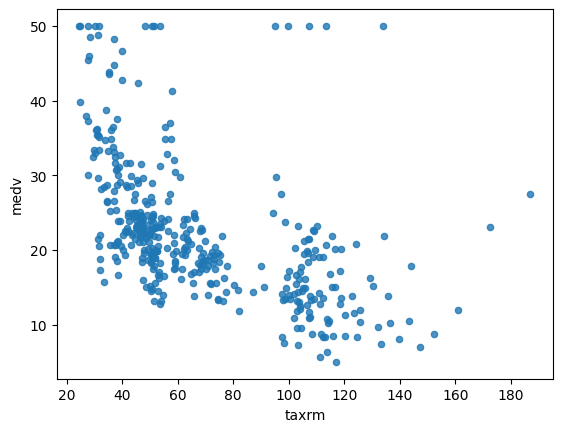

In [29]:
housing.plot(kind="scatter",x='taxrm',y='medv',alpha=0.8)

In [30]:
housing= strat_train_set.drop("medv",axis=1)
housing_labels = strat_train_set['medv'].copy()

In [31]:
 median = housing['rm'].median()

In [32]:
# median

In [33]:
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X= imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [39]:
# housing_tr.describe()

# sckit-learn Design

primarily three types of objects
1. Estimators - Ity estimats some parameters based on a data sets. eg- imputer
2. Transformers-takes input and returns output based on the learnings from fit() . 
3. Predicators - Linearregression model is an example ,fit()and ptredict() are common functions or class

## Creating pipeline

two tyepe of feature scaling method-
1. min-max scaling (value-min)/(max-min)
2. Standeredization

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr.shape

(404, 13)

## Selecting a desired  model for Dragon Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.527, 25.136, 16.488, 23.477, 23.502])

In [48]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: medv, dtype: float64

## Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)

In [50]:
lin_mse

1.7114489554455432

In [51]:
lin_rmse = np.sqrt(lin_mse)

In [52]:
lin_rmse

1.3082235877118036

## using cross validation

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_labels, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([2.71420376, 2.87110264, 4.39593772, 2.74647454, 3.37981502,
       2.63151195, 4.8597616 , 3.30310057, 2.82784454, 3.30483886])

In [55]:
def print_scores(scores):
    print("scores", scores)
    print("mean",scores.mean())
    print("Standered Deviation",scores.std())
    
    

In [56]:
print_scores(rmse_scores)

scores [2.71420376 2.87110264 4.39593772 2.74647454 3.37981502 2.63151195
 4.8597616  3.30310057 2.82784454 3.30483886]
mean 3.3034591208733097
Standered Deviation 0.7171838822270437


In [57]:
from joblib import dump, load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## testing the model

In [58]:
X_test  =strat_test_set.drop("medv",axis=1)
Y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

2.9750268082496185